## Classification of stars in HR diagram 

---



Hertzsprung–Russell diagram is a scatter plot of stars based on how bright they are (luminosity/absolute magnitude) and how hot they are (temperature/spectral type). Different types of stars occupy different parts of the H-R diagram. This exercise uses this star data to predict star types. 

<img src="https://chandra.harvard.edu/graphics/edu/formal/variable_stars/diagram.jpg" alt="alt text" title="image Title" width="350"/>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import sklearn.linear_model
import seaborn as sb
from scipy import stats

### Read data from csv. Add labels for star types.



In [ ]:
# first upload this file to colab
df = pd.read_csv('./stardata.csv')
df.info() 
print("\nSample readings:\n")
print(df)
star_type_names = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant']
# Star Type = 0 is Brown Dwarf , Star Type = 1 is Red Dwarf etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB

Sample readings:

     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2

### Check names for Star color and Spectral Class. Fix inconsistent naming.

In [ ]:
print(np.unique(df['Star color']))
print(np.unique(df['Spectral Class']))
# there is naming inconsistency in star color such as "Blue white" and "Blue-White"

['Blue' 'Blue ' 'Blue White' 'Blue white' 'Blue white ' 'Blue-White'
 'Blue-white' 'Orange' 'Orange-Red' 'Pale yellow orange' 'Red' 'White'
 'White-Yellow' 'Whitish' 'Yellowish' 'Yellowish White' 'white'
 'yellow-white' 'yellowish']
['A' 'B' 'F' 'G' 'K' 'M' 'O']


In [ ]:
df = df.replace({'Star color': ['Blue ', 'Blue white','Blue white ', 'Blue-White', 'Blue-white', 'Orange-Red', 'Pale yellow orange', 'White-Yellow', 'Yellowish White','yellow-white','white','yellowish' ]},
            {'Star color': ['Blue', 'Blue White', 'Blue White', 'Blue White', 'Blue White', 'Orange Red', 'Pale Yellow Orange', 'White Yellow', 'White Yellow', 'White Yellow', 'White','Yellowish']})

### Plotting data



In [ ]:
#color for plot points based on oberved star color
color_dict = {
    'Red': 'tomato',
    'Blue': 'cornflowerblue',
    'Blue White': 'lightskyblue',
    'Orange Red': 'orangered',
    'Pale Yellow Orange': 'papayawhip',
    'White Yellow': 'lightyellow',
    'Whitish': 'aliceblue',
    'White': 'white',
    'Yellowish': 'gold',
    'Orange': 'orange'
}
color_values = df['Star color'].tolist()  # list of observed star colors
color_scheme1 = [color_dict[x] for x in color_values] # list of colors of plotted points

#to color according to star type:
star_type_colors = ['brown', 'red', 'white', 'gold', 'cyan', 'blue']
star_type_values = df['Star type'].tolist() # list of star type
color_scheme2 = [star_type_colors[x] for x in star_type_values] # list of colors for plotted points (based on star type)



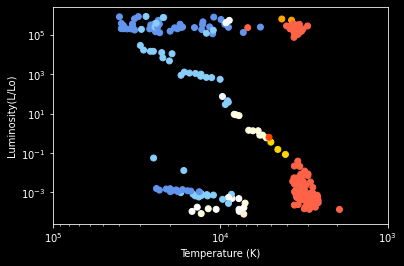

Chart of luminosity, temperature and observed color



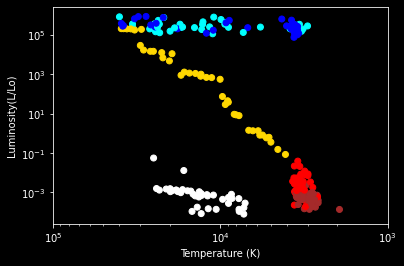

Chart of luminosity, temperature colored by star type
Brown Dwarf : brown
Red Dwarf : red
White Dwarf : white
Main Sequence : gold
Supergiant : cyan
Hypergiant : blue


In [ ]:
# generates a log-log plot of luminosity vs temperature
def plot_data(color_scheme):
  # read star data and plot points for luminosity vs temperature graph 
  px = df['Temperature (K)'].to_numpy()
  py = df['Luminosity(L/Lo)'].to_numpy()
  plt.xscale("log")
  plt.yscale("log")
  plt.scatter(px, py, c=color_scheme, marker='o') 
  # set labels, background color, ticks. Invert x axis to match the HR diagram
  plt.xlabel("Temperature (K)")
  plt.ylabel("Luminosity(L/Lo)")
  plt.gca().invert_xaxis()
  plt.style.use("dark_background")
  plt.xticks([1e3, 1e4, 1e5])
  plt.show()
  
plot_data(color_scheme1)
print("Chart of luminosity, temperature and observed color\n")
plot_data(color_scheme2)
print("Chart of luminosity, temperature colored by star type")
for (n,c) in zip(star_type_names, star_type_colors):
  print(n, ":", c)  # prints the color code for star type


### Prepare training and test inputs and outputs

#### One Hot Encoding
Colors should not be encoded as a series of integers 0, 1, 2, 3... the computer may wrongly assume that some colors are greater and more important than others. Instead each color is encoded as a separate feature. It takes value 1 for that color, 0 for other colors.

#### Normalization
Transform input features to the range 0 to 1.

#### Split data into training and test set
Given a dataset, we typically assign 80% of the input-output records to form the training set. The rest of the records form the test set. The test set is used as fresh data to judge the performance of the trained model.

In [ ]:
input = df.copy()
input = pd.get_dummies(input, columns=['Star color', 'Spectral Class'], drop_first=True) # one hot encoding for discrete categories

output= input.pop('Star type') # separate outputs

# OPTIONAL: dropping some input variables to check their effect on accuracy
#input = input.drop(columns=['Radius(R/Ro)', 'Luminosity(L/Lo)'])  
#input = input.loc[:,~input.columns.str.startswith('Star color')]    # keeps all columns except Star color related
#input = input.loc[:,~input.columns.str.startswith('Spectral Class')] # keeps all columns except Spectral Class related

#input = normalize(input)

# split data into training set (80%) and testing set(20%). 
xtrain, xtest, ytrain, ytest = train_test_split(input, output, random_state=7, test_size=0.2)

### Training Model

In [ ]:
# Choose model
#clf=tree.DecisionTreeClassifier()
#clf=RandomForestClassifier(n_estimators=10, criterion='log_loss')
clf= sklearn.linear_model.LogisticRegression(multi_class='ovr', max_iter=1000)      # ovr is  one-vs-rest 

# train the model by feeding it inputs and target outputs
clf.fit(xtrain,ytrain) 

# print accuracy of predictions 
print("Training set accuracy:", clf.score(xtrain,ytrain)) 
print("Test set accuracy:", clf.score(xtest,ytest)) # test accuracy is based on fresh inputs, not used for training

Training set accuracy: 1.0
Test set accuracy: 0.9583333333333334


### Prediction Results

In [ ]:
ypredict = clf.predict(xtest) # predictions made on test inputs

examples = 10
for (actual, predicted, i) in zip(ytest, ypredict, range(examples)):
    print(star_type_names[actual] +" > predicted as > " + star_type_names[predicted])

White Dwarf > predicted as > White Dwarf
Brown Dwarf > predicted as > Brown Dwarf
Brown Dwarf > predicted as > Red Dwarf
White Dwarf > predicted as > White Dwarf
White Dwarf > predicted as > White Dwarf
Red Dwarf > predicted as > Red Dwarf
Main Sequence > predicted as > Main Sequence
White Dwarf > predicted as > White Dwarf
Brown Dwarf > predicted as > Brown Dwarf
Hypergiant > predicted as > Hypergiant


## Data analysis

### Statistics

In [ ]:
logT = np.log10(df['Temperature (K)'])
avgT = logT.mean()
stdT = logT.std()
print("Mean of log(Temperature):", avgT )
print("Standard Deviation of log(Temperature):", stdT )

gmeans = stats.gmean(df.iloc[:,:3])
print("\nGeometric means for")
print("Temperature(K):", gmeans[0])
print("Luminosity(L/Lo):", gmeans[1])
print("Radius(R/Ro)", gmeans[2])

Mean of log(Temperature): 3.8569645518648032
Standard Deviation of log(Temperature): 0.37223551229162566

Geometric means for
Temperature(K): 7193.902572855724
Luminosity(L/Lo): 5.094597342881513
Radius(R/Ro) 2.0239253642704016


### Correlation heatmap of continuous inputs 

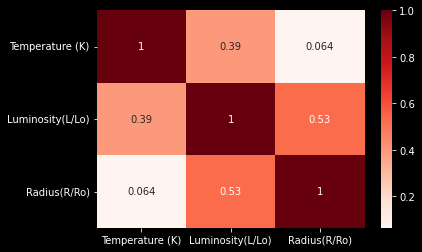

In [ ]:
continuous_inputs = df.iloc[:,:3] # choose some continuously varying inputs
dataplot = sb.heatmap(continuous_inputs.corr(), cmap="Reds", annot=True)
plt.show()

Luminosity of a black body is proportional to suraface area and 4th power of temperature.